In [77]:
from lcmap.client import Client
client = Client();

In [80]:
ubid = "LANDSAT_5/TM/cfmask"
x, y = -2096625, 3095025
t1, t2 = '1985-01-01', '1985-05-01'

In [81]:
mask_spec, masks = client.data.tiles("LANDSAT_5/TM/cfmask", x, y, t1, t2, mask=False, unscale=False)
srb1_spec, sr_b1 = client.data.tiles("LANDSAT_5/TM/sr_band1", x, y ,t1, t2, mask=False, unscale=False)

In [6]:
masks[0].data

array([[1, 3, 3, ..., 0, 0, 0],
       [1, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 3, 3, 3]], dtype=uint8)

Get information about the mask using the tile spec.

In [7]:
mask_spec

{u'band_category': u'qa',
 u'band_long_name': u'cfmask_band',
 u'band_name': u'cfmask',
 u'band_product': u'cfmask',
 u'band_short_name': u'LT5CFMASK',
 u'band_spectrum': None,
 u'data_fill': 255,
 u'data_mask': {u'0': u'clear',
  u'1': u'water',
  u'2': u'cloud_shadow',
  u'255': u'fill',
  u'3': u'snow',
  u'4': u'cloud'},
 u'data_range': [0, 4],
 u'data_scale': None,
 u'data_shape': [256, 256],
 u'data_type': u'UINT8',
 u'data_units': None,
 u'instrument': u'TM',
 u'keyspace_name': u'lcmap',
 u'pixel_x': 30.0,
 u'pixel_y': -30.0,
 u'projection': u'PROJCS["Albers",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["false_easting",0],PARAM

Assign the first mask and sr_band1 tile to more convenient names.

In [8]:
m0, t0 = masks[0], sr_b1[0]

Are the two tiles acquired at the same moment in time, from the same source?

In [9]:
[m0.acquired==t0.acquired, m0.source==t0.source]

[True, True]

Now, use the mask to filter out the SR data.

In [10]:
import numpy as np

In [11]:
m0.data

array([[1, 3, 3, ..., 0, 0, 0],
       [1, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 3, 3, 3]], dtype=uint8)

Counting the unmasked data points. No surprise, 256*256...

In [12]:
np.ma.count(t0.data)

65536

Counting the clear pixels...

In [13]:
np.ma.masked_where(m0.data == 0, t0.data)

masked_array(data =
 [[2502 2659 5805 ..., -- -- --]
 [2450 3126 6138 ..., -- -- --]
 [4884 8341 9003 ..., -- -- --]
 ..., 
 [-- -- -- ..., 1575 2469 3343]
 [-- -- -- ..., 1575 1254 1575]
 [-- -- -- ..., 1254 660 1146]],
             mask =
 [[False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 ..., 
 [ True  True  True ..., False False False]
 [ True  True  True ..., False False False]
 [ True  True  True ..., False False False]],
       fill_value = 999999)

In [14]:
np.ma.masked_where(m0.data == 2, t0.data)

masked_array(data =
 [[2502 2659 5805 ...,  408  408  464]
 [2450 3126 6138 ...,  408  464  464]
 [4884 8341 9003 ...,  519  630  574]
 ..., 
 [ 252  363  418 ..., 1575 2469 3343]
 [ 308  308  308 ..., 1575 1254 1575]
 [ 308  308  363 ..., 1254  660 1146]],
             mask =
 False,
       fill_value = 999999)

In [15]:
np.ma.masked_where(m0.data == 4, t0.data).count()

64900

In [53]:
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib as mpl
import skimage.exposure as ex
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [54]:
mask_spec['data_mask']

{u'0': u'clear',
 u'1': u'water',
 u'2': u'cloud_shadow',
 u'255': u'fill',
 u'3': u'snow',
 u'4': u'cloud'}

In [63]:
labels = mask_spec['data_mask'].values()
N = len(labels)
cmap = plt.cm.jet
cmaplist = [cmap(i*2) for i in range(N)]
cmap = cmap.from_list('CFMask cmap', cmaplist, N)

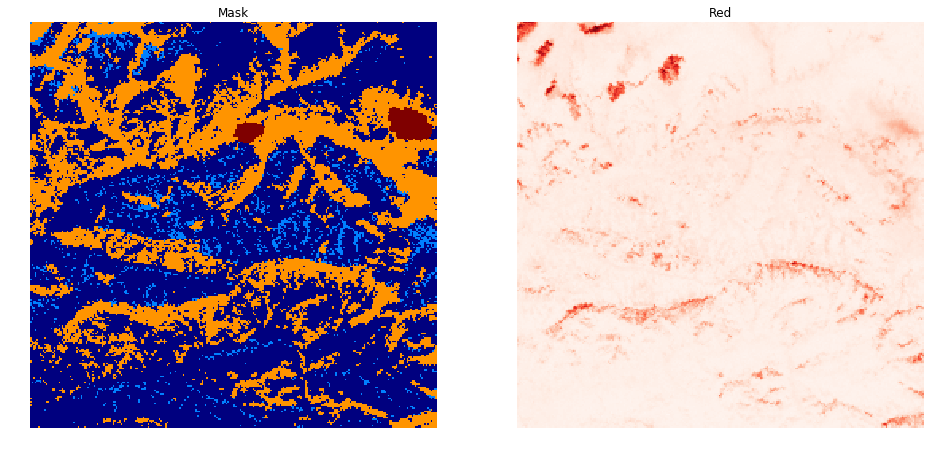

In [76]:
fig = plt.figure(figsize=(16,8))

s1 = fig.add_subplot(1,2,1)
s1.axis('off')
s1.set_title("Mask")
s1.imshow(m0.data, interpolation='nearest')

s2 = fig.add_subplot(1,2,2)
s2.axis('off')
s2.set_title("Red")
s2.imshow(t0.data, interpolation='nearest', cmap=cm.Reds)